1) 

In [2]:
from scipy.stats import chisquare

observed = [36, 53, 35, 26, 30, 44, 28]

# Ожидаемые частоты
expected = [sum(observed) / len(observed)] * len(observed)
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем H0: распределение неравномерное")
else:
    print("Не отвергаем H0: распределение равномерное")

Хи-квадрат статистика: 15.3889
P-значение: 0.0174
Отвергаем H0: распределение неравномерное


3.a)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Загрузка данных
data = pd.read_csv('_data_.csv')
control = data[data['group'] == 'control']['data']
test = data[data['group'] == 'test']['data']

# t-тест
t_stat, p_value = ttest_ind(test, control, equal_var=False)

print(f"t-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем H0: средние не равны (p < 0.05)")
else:
    print("Не отвергаем H0: средние равны (p >= 0.05)")

t-статистика: 91.8768
P-значение: 0.0000
Отвергаем H0: средние не равны (p < 0.05)


3.b)

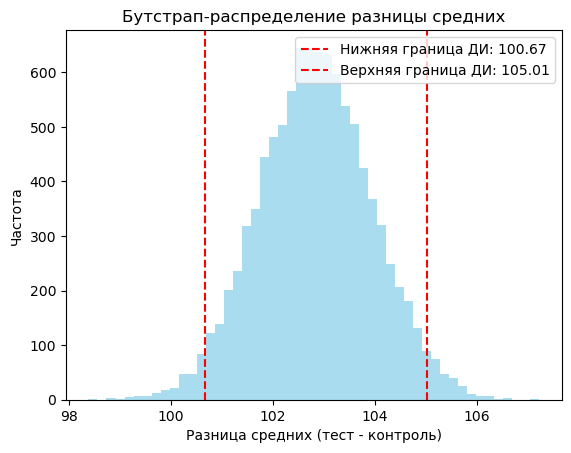

95% Доверительный интервал для разницы средних: [100.67, 105.01]
Отвергаем H0: средние не равны (0 не входит в ДИ)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_diff_mean(test, control, B=10000, alpha=0.05):
    n_test = len(test)
    n_control = len(control)
    diffs = []

    for _ in range(B):
        test_sample = np.random.choice(test, size=n_test, replace=True)
        control_sample = np.random.choice(control, size=n_control, replace=True)
        diffs.append(np.mean(test_sample) - np.mean(control_sample))

    lower = np.percentile(diffs, 100 * alpha / 2)
    upper = np.percentile(diffs, 100 * (1 - alpha / 2))
    ci = (lower, upper)
    contains_zero = lower <= 0 <= upper

    plt.hist(diffs, bins=50, alpha=0.7, color='skyblue')
    plt.axvline(lower, color='red', linestyle='--', label=f'Нижняя граница ДИ: {lower:.2f}')
    plt.axvline(upper, color='red', linestyle='--', label=f'Верхняя граница ДИ: {upper:.2f}')
    plt.xlabel('Разница средних (тест - контроль)')
    plt.ylabel('Частота')
    plt.title('Бутстрап-распределение разницы средних')
    plt.legend()
    plt.show()

    return ci, contains_zero

ci, contains_zero = bootstrap_diff_mean(test, control)
print(f"95% Доверительный интервал для разницы средних: [{ci[0]:.2f}, {ci[1]:.2f}]")
if not contains_zero:
    print("Отвергаем H0: средние не равны (0 не входит в ДИ)")
else:
    print("Не отвергаем H0: средние равны (0 входит в ДИ)")

3.c)

Сравнение t-теста и бутстрапа

t-тест:

	*Быстрый, но требует допущений (нормальность, гомоскедастичность).

	*Для больших выборок (n=100000) robust к отклонениям от нормальности.

Бутстрап:

	*Не требует допущений, работает для любых распределений.

	*Вычислительно затратен, но точен.

Вывод:

	*Если оба метода согласуются (например, оба отвергают H0), результат надежен.

	*Если есть расхождения, предпочтительнее бутстрап (особенно для квантилей или малых выборок).

3.d)

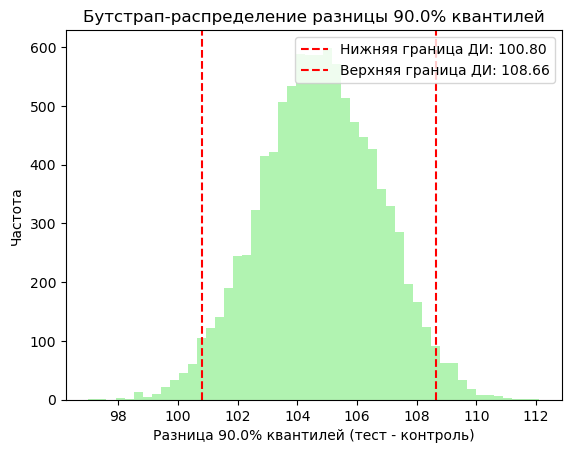

95% Доверительный интервал для разницы 90% квантилей: [100.80, 108.66]
Отвергаем H0: квантили не равны (0 не входит в ДИ)


In [11]:
def bootstrap_diff_quantile(test, control, B=10000, alpha=0.05, q=0.9):
    n_test = len(test)
    n_control = len(control)
    diffs = []

    for _ in range(B):
        test_sample = np.random.choice(test, size=n_test, replace=True)
        control_sample = np.random.choice(control, size=n_control, replace=True)
        diffs.append(np.quantile(test_sample, q) - np.quantile(control_sample, q))

    lower = np.percentile(diffs, 100 * alpha / 2)
    upper = np.percentile(diffs, 100 * (1 - alpha / 2))
    ci = (lower, upper)
    contains_zero = lower <= 0 <= upper

    plt.hist(diffs, bins=50, alpha=0.7, color='lightgreen')
    plt.axvline(lower, color='red', linestyle='--', label=f'Нижняя граница ДИ: {lower:.2f}')
    plt.axvline(upper, color='red', linestyle='--', label=f'Верхняя граница ДИ: {upper:.2f}')
    plt.xlabel(f'Разница {q*100}% квантилей (тест - контроль)')
    plt.ylabel('Частота')
    plt.title(f'Бутстрап-распределение разницы {q*100}% квантилей')
    plt.legend()
    plt.show()

    return ci, contains_zero

ci, contains_zero = bootstrap_diff_quantile(test, control, q=0.9)
print(f"95% Доверительный интервал для разницы 90% квантилей: [{ci[0]:.2f}, {ci[1]:.2f}]")
if not contains_zero:
    print("Отвергаем H0: квантили не равны (0 не входит в ДИ)")
else:
    print("Не отвергаем H0: квантили равны (0 входит в ДИ)")